<a href="https://colab.research.google.com/github/Udayr777/Machine-Learning/blob/main/Timeseries_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# importing libraries
import pandas as pd
import numpy as np

In [3]:
# Mounting Google Drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [7]:
# load the dataset
dataset = pd.read_csv("/content/drive/MyDrive/Kaggle_Dataset/book_sales.csv", index_col = 'Date', parse_dates=['Date'])
dataset.head()

,Paperback,Hardcover
Date,,
2000-04-01,199,139
2000-04-02,172,128
2000-04-03,111,172
2000-04-04,209,139
2000-04-05,161,191


In [8]:
# checking for missing values
missing_values = dataset.isnull().sum()
missing_values

Paperback    0
Hardcover    0
dtype: int64

In [15]:
# droping the column Paperback
dataset = dataset.drop('Paperback', axis = 1)
dataset.head()

,Hardcover
Date,
2000-04-01,139
2000-04-02,128
2000-04-03,172
2000-04-04,139
2000-04-05,191


In [18]:
dataset['Time'] = np.arange(len(dataset.index))
dataset.head()

,Hardcover,Time
Date,,
2000-04-01,139,0
2000-04-02,128,1
2000-04-03,172,2
2000-04-04,139,3
2000-04-05,191,4


In [24]:
# import visualizing graph libraries
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-56-eff76761c5d2>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


Text(0.5, 1.0, 'Time Plot of Hardcover Sales')

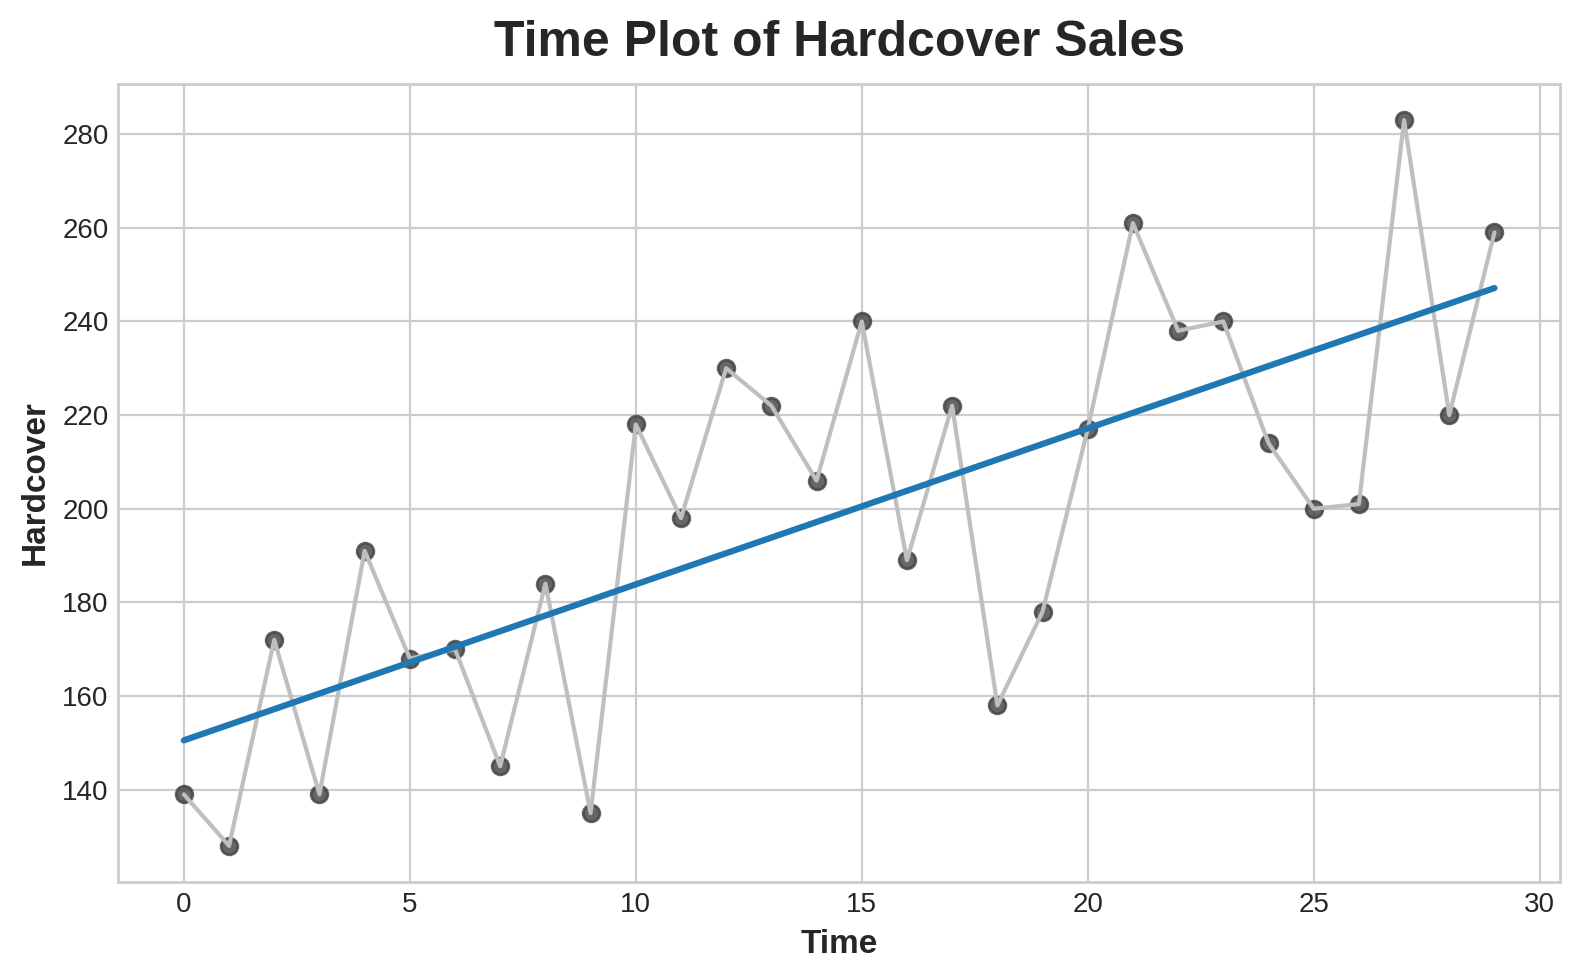

In [56]:
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout = True, figsize = (8,5), titlesize = 18, titleweight = 'bold')
plt.rc("axes", labelweight = 'bold',labelsize = 'large', titleweight='bold', titlesize = 18, titlepad = 10)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.subplots()
plt.plot('Time','Hardcover', data = dataset, color = '0.75')
ax = sns.regplot(x='Time', y='Hardcover', data = dataset, ci=None, scatter_kws=dict(color='0.25') )
# ax.set_title("Time Plot of Hardcover Sales")
plt.title("Time Plot of Hardcover Sales")

In [59]:
dataset['Lag_1'] = dataset.Hardcover.shift(1)
dataset = dataset.reindex(columns=['Hardcover','Lag_1'])
dataset.head()

,Hardcover,Lag_1
Date,,
2000-04-01,139,NaN
2000-04-02,128,139.0
2000-04-03,172,128.0
2000-04-04,139,172.0
2000-04-05,191,139.0


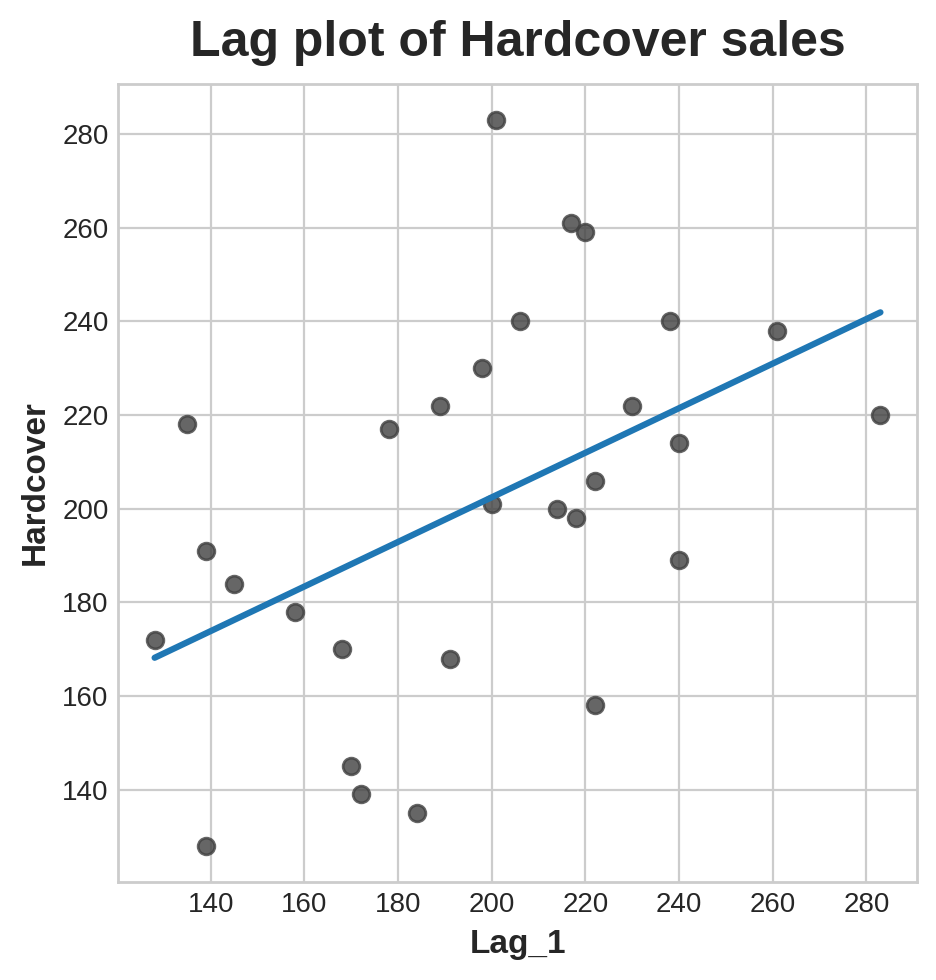

In [64]:
fig, ax = plt.subplots()
ax = sns.regplot(x = "Lag_1", y = 'Hardcover',data = dataset, ci=None, scatter_kws=dict(color='0.25'))
plt.title('Lag plot of Hardcover sales')
ax.set_aspect('equal')